### Step 1

In [1]:
import pandas as pd

fert = pd.read_csv('gapminder_total_fertility.csv', index_col=0)

### Step 2

In [2]:
life = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col=0)

### Step 3

In [3]:
fert.shape

(260, 216)

In [4]:
life.shape

(260, 217)

### Step 4

In [5]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [6]:
life.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

In [7]:
ncol = [int(x) for x in fert.columns]

fert.set_axis(axis=1, labels=ncol, inplace=True)

In [8]:
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

### Step 5

In [9]:
sfert = fert.stack()
slife = life.stack()

In [10]:
d = {'fertility': sfert, 'lifeexp': slife}
df2 = pd.DataFrame(data=d)

In [11]:
df2

fertility  lifeexp
Afghanistan 1800        7.0    28.21
            1801        7.0    28.20
            1802        7.0    28.19
            1803        7.0    28.18
            1804        7.0    28.17
...                     ...      ...
Åland       2002        NaN    81.80
            2003        NaN    80.63
            2004        NaN    79.88
            2005        NaN    80.00
            2006        NaN    80.10

[44007 rows x 2 columns]

### Step 6

In [12]:
pop = pd.read_excel('gapminder_population.xlsx', index_col=0)

In [13]:
pop.shape

(275, 81)

In [14]:
pop.columns

Int64Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
            1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
            1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015],
           dtype='int64')

In [15]:
spop = pop.stack()

In [16]:
d2 = {'fertility': sfert, 'lifeexp': slife, 'population': spop}
df_pop = pd.DataFrame(data=d2)

In [17]:
# make population values more readable and prepare for later use (as dot size in scatterplot)

df_pop['population_in_millions'] = df_pop['population'] / 1000000


In [18]:
df_pop = df_pop.drop(columns=['population'])
df_pop

fertility  lifeexp  population_in_millions
Afghanistan 1800        7.0    28.21                3.280000
            1801        7.0    28.20                     NaN
            1802        7.0    28.19                     NaN
            1803        7.0    28.18                     NaN
            1804        7.0    28.17                     NaN
...                     ...      ...                     ...
Åland       2006        NaN    80.10                0.026923
            2007        NaN      NaN                0.026923
            2008        NaN      NaN                0.026923
            2009        NaN      NaN                0.026923
            2010        NaN      NaN                0.026923

[47688 rows x 3 columns]

### Step 7

In [19]:
df3 = df_pop.stack()
df3

Afghanistan  1800  fertility                  7.000000
                   lifeexp                   28.210000
                   population_in_millions     3.280000
             1801  fertility                  7.000000
                   lifeexp                   28.200000
                                               ...    
Åland        2006  population_in_millions     0.026923
             2007  population_in_millions     0.026923
             2008  population_in_millions     0.026923
             2009  population_in_millions     0.026923
             2010  population_in_millions     0.026923
Length: 107445, dtype: float64

In [20]:
df4 = df3.unstack((0,2))
df4

Afghanistan                                 Akrotiri and Dhekelia  \
       fertility lifeexp population_in_millions population_in_millions   
1800        7.00   28.21               3.280000                    NaN   
1801        7.00   28.20                    NaN                    NaN   
1802        7.00   28.19                    NaN                    NaN   
1803        7.00   28.18                    NaN                    NaN   
1804        7.00   28.17                    NaN                    NaN   
...          ...     ...                    ...                    ...   
2012        5.14   54.40              29.726803                    NaN   
2013        4.90   54.80              30.682500                    NaN   
2014        4.68   54.90              31.627506                    NaN   
2015        4.47   53.80              32.526562                    NaN   
2016         NaN   52.72                    NaN                    NaN   

       Albania                                  Algeria          \
     fertility lifeexp population_in_millions fertility lifeexp   
1800      4.60    35.4               0.410445      6.99   28.82   
1801      4.60    35.4                    NaN      6.99   28.82   
1802      4.60    35.4                    NaN      6.99   28.82   
1803      4.60    35.4                    NaN      6.99   28.82   
1804      4.60    35.4                    NaN      6.99   28.82   
...        ...     ...                    ...       ...     ...   
2012      1.76    77.5               2.880667      2.82   76.20   
2013      1.77    77.7               2.883281      2.80   76.30   
2014      1.78    77.9               2.889676      2.76   76.30   
2015      1.78    78.0               2.896679      2.71   76.40   
2016       NaN    78.1                    NaN       NaN   76.50   

                             ...                  Yemen  \
     population_in_millions  ... population_in_millions   
1800               2.503218  ...               2.593000   
1801                    NaN  ...                    NaN   
1802                    NaN  ...                    NaN   
1803                    NaN  ...                    NaN   
1804                    NaN  ...                    NaN   
...                     ...  ...                    ...   
2012              37.439427  ...              24.882792   
2013              38.186135  ...              25.533217   
2014              38.934334  ...              26.183676   
2015              39.666519  ...              26.832215   
2016                    NaN  ...                    NaN   

                 Yugoslavia    Zambia                                 \
     population_in_millions fertility lifeexp population_in_millions   
1800                    NaN      6.71    32.6               0.747000   
1801                    NaN      6.71    32.6                    NaN   
1802                    NaN      6.71    32.6                    NaN   
1803                    NaN      6.71    32.6                    NaN   
1804                    NaN      6.71    32.6                    NaN   
...                     ...       ...     ...                    ...   
2012                    NaN      5.73    54.7              14.786581   
2013                    NaN      5.69    55.6              15.246086   
2014                    NaN      5.64    56.3              15.721343   
2015                    NaN      5.59    56.7              16.211767   
2016                    NaN       NaN    57.1                    NaN   

      Zimbabwe                                                 Åland          
     fertility lifeexp population_in_millions population_in_millions lifeexp  
1800      6.75   33.70               1.085814                    NaN     NaN  
1801      6.75   33.70                    NaN                    NaN     NaN  
1802      6.75   33.70                    NaN                    NaN     NaN  
1803      6.75   33.70                    NaN                    NaN  

### Step 8

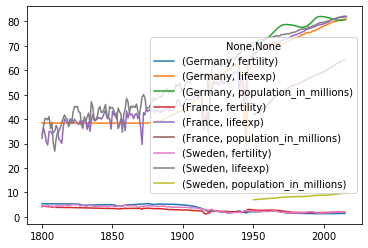

In [21]:
import pylab as plt
df4[['Germany', 'France', 'Sweden']].plot()

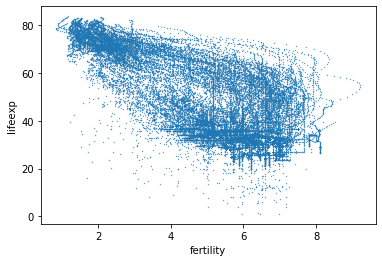

In [22]:
df5 = df3.unstack(2)
df5.plot.scatter('fertility', 'lifeexp', s=0.1)

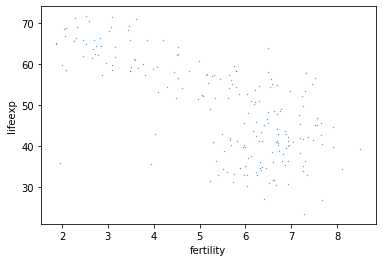

In [23]:
df6 = df3.unstack(1)
df6 = df6[1950]
df6 = df6.unstack(1)
df6.plot.scatter('fertility', 'lifeexp', s=0.1)

### Step 9

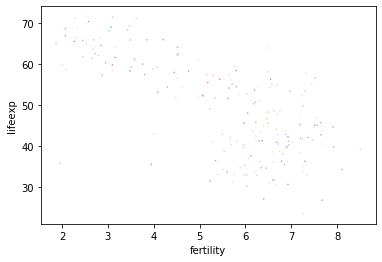

In [24]:
cmap = plt.get_cmap('tab20', lut = len(df6)).colors
df6.plot.scatter('fertility', 'lifeexp', s=0.1, c=cmap)

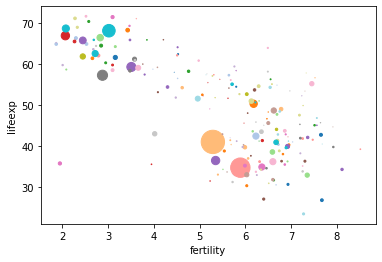

In [25]:
df6.plot.scatter('fertility', 'lifeexp', s=df6['population_in_millions'], c=cmap)

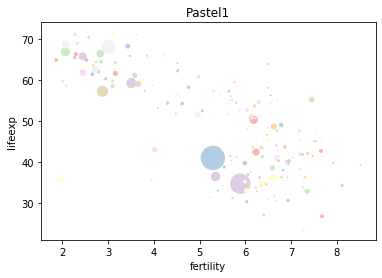

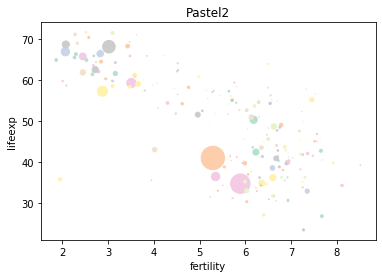

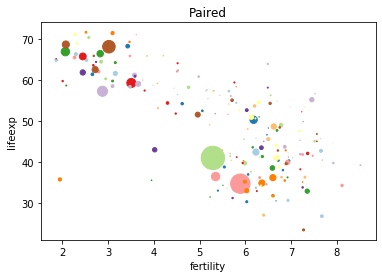

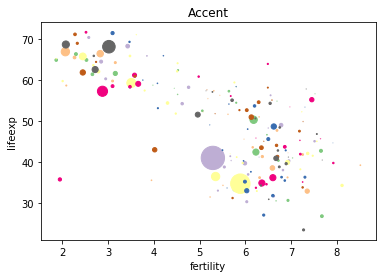

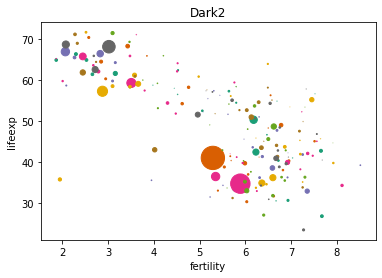

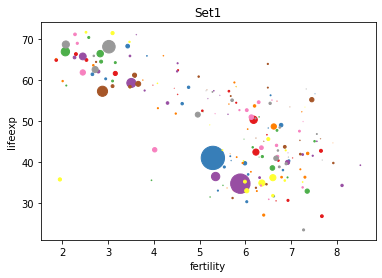

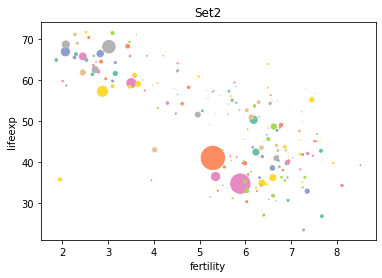

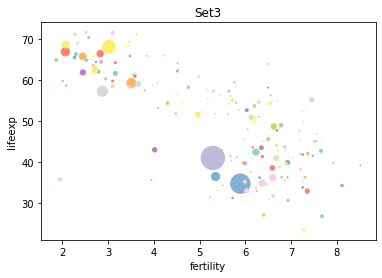

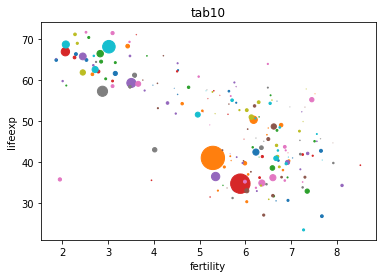

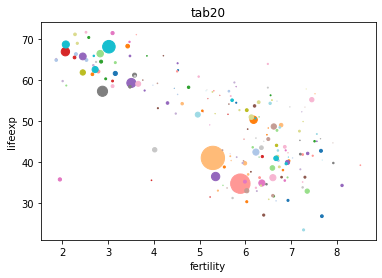

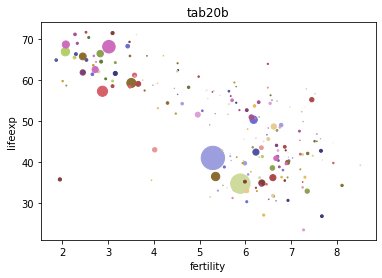

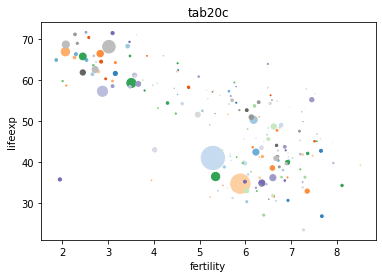

In [26]:
# playing around with different colormaps

cmap_styles = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

for style in cmap_styles:
    cmap = plt.get_cmap(style, lut = len(df6)).colors
    df6.plot.scatter('fertility', 'lifeexp', s=df6['population_in_millions'], c=cmap)
    plt.title(style)

/home/denniss/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/home/denniss/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/home/denniss/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot i

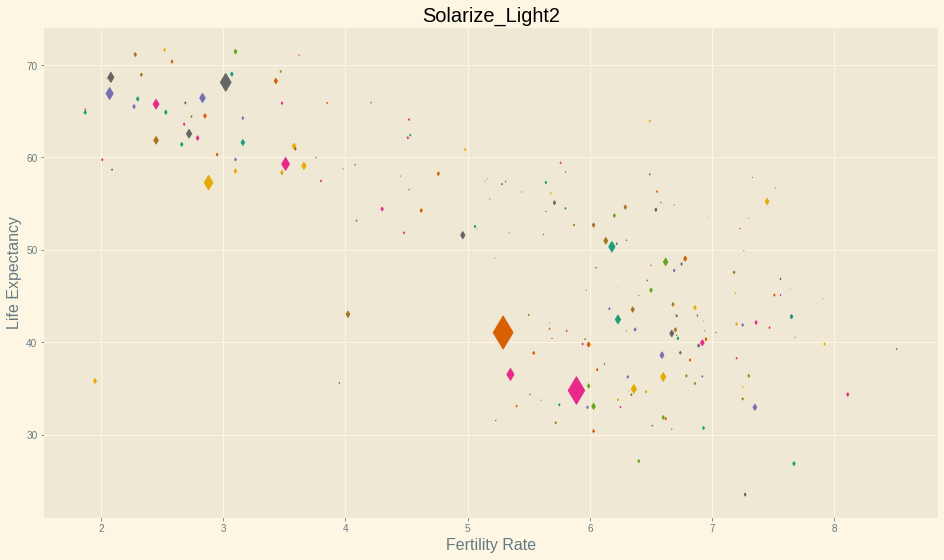

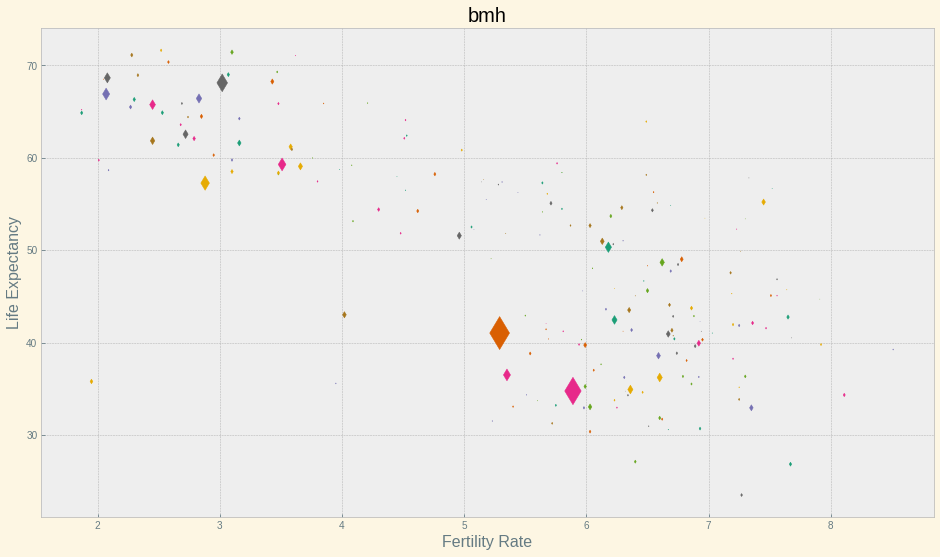

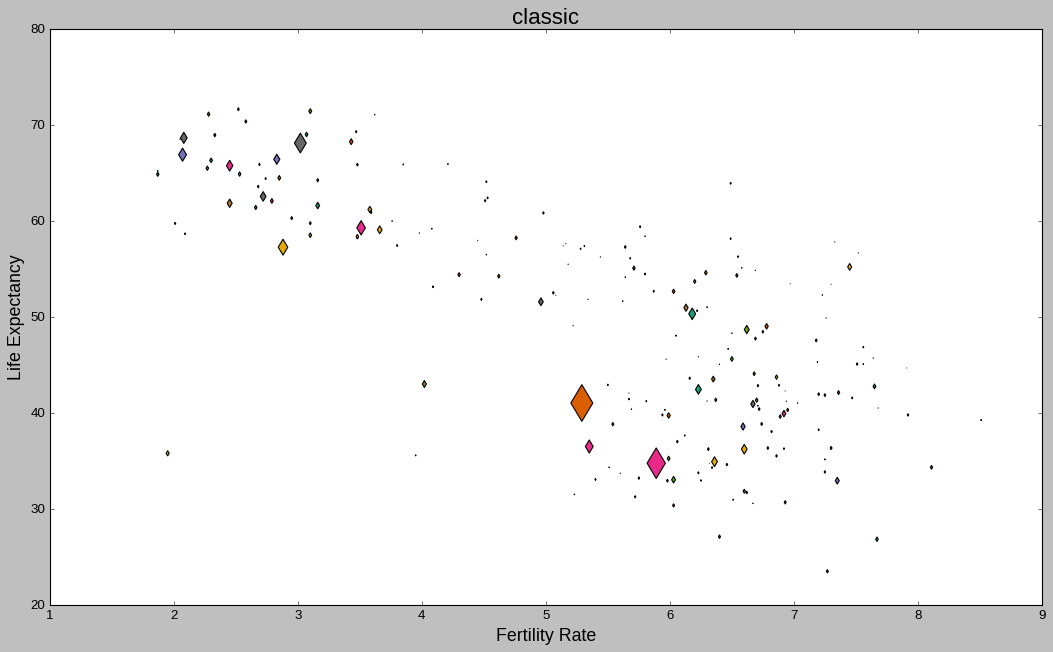

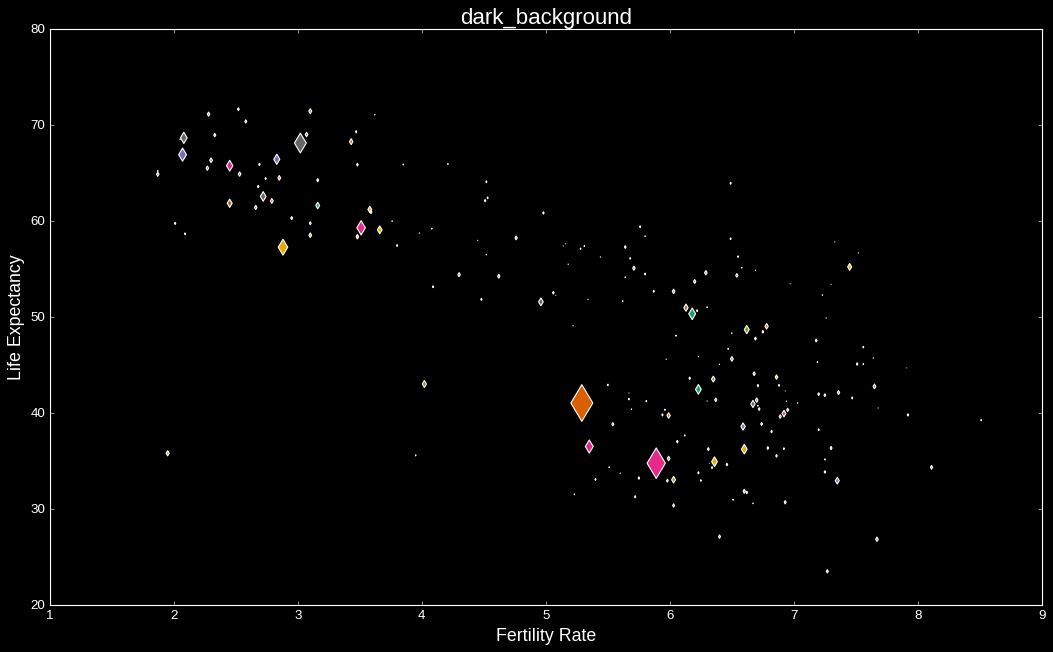

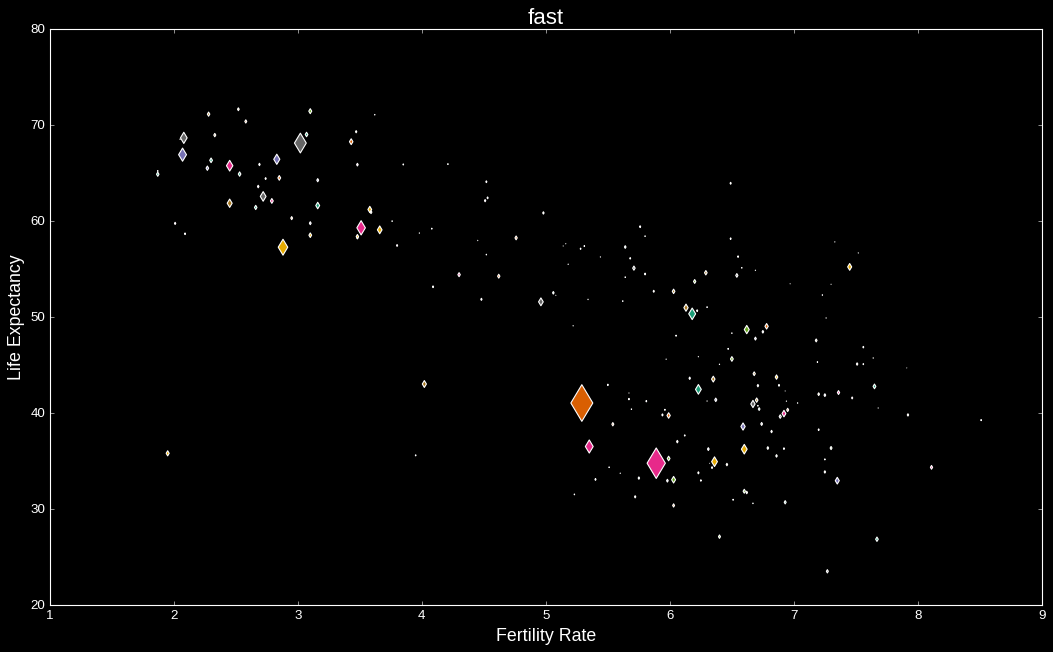

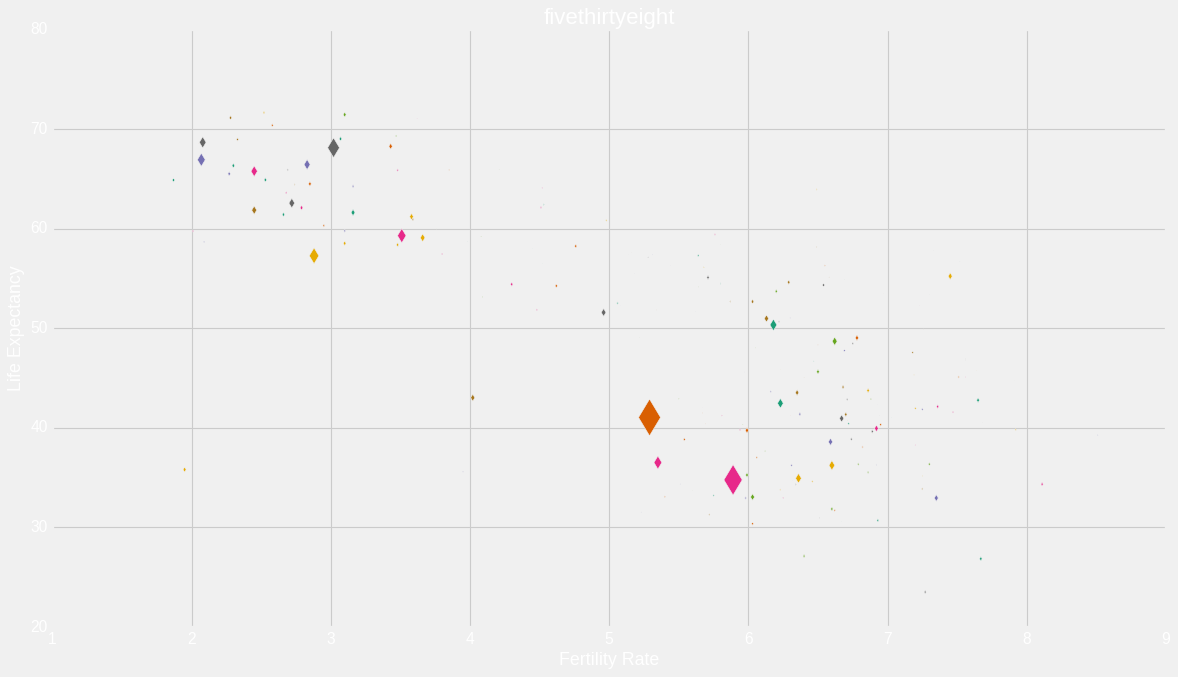

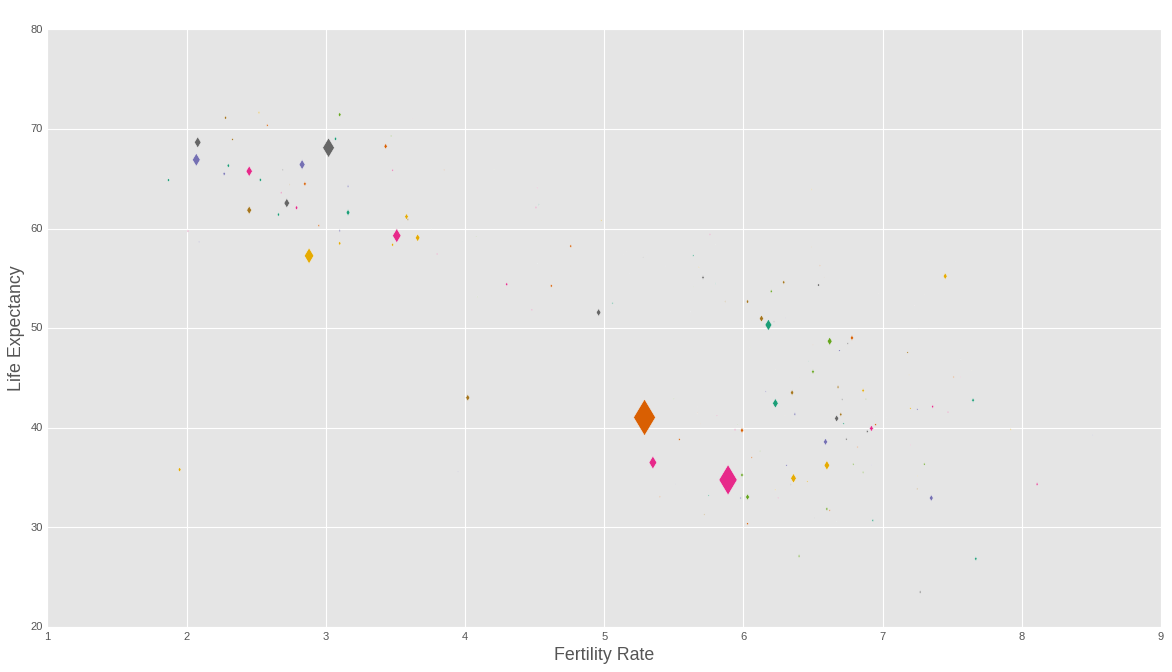

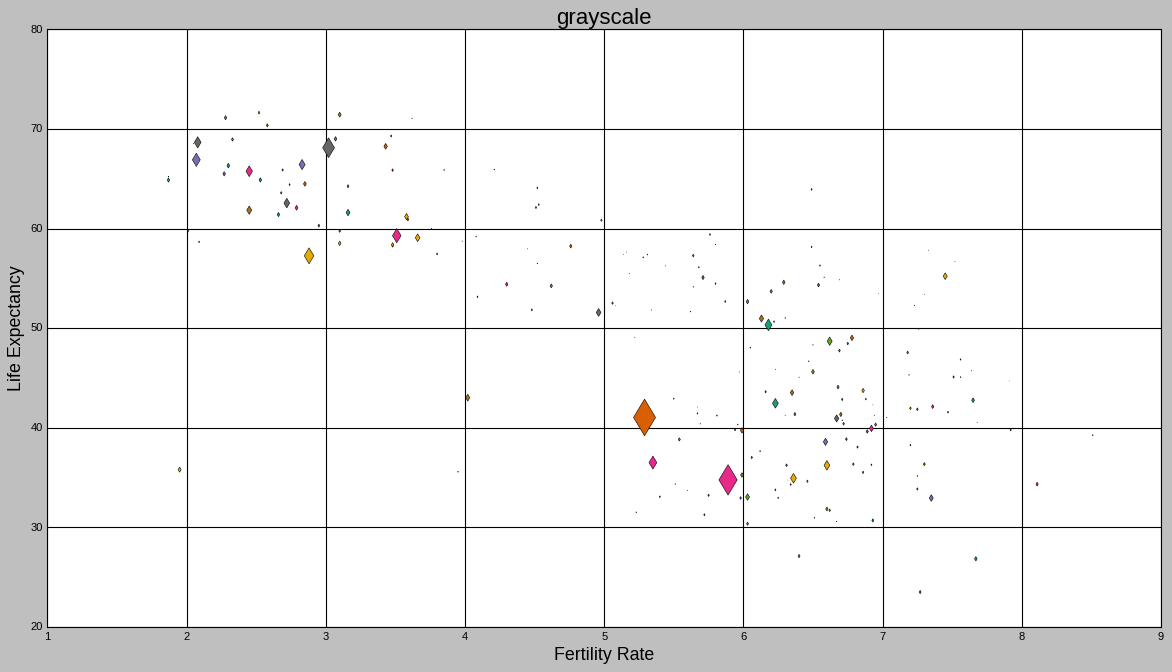

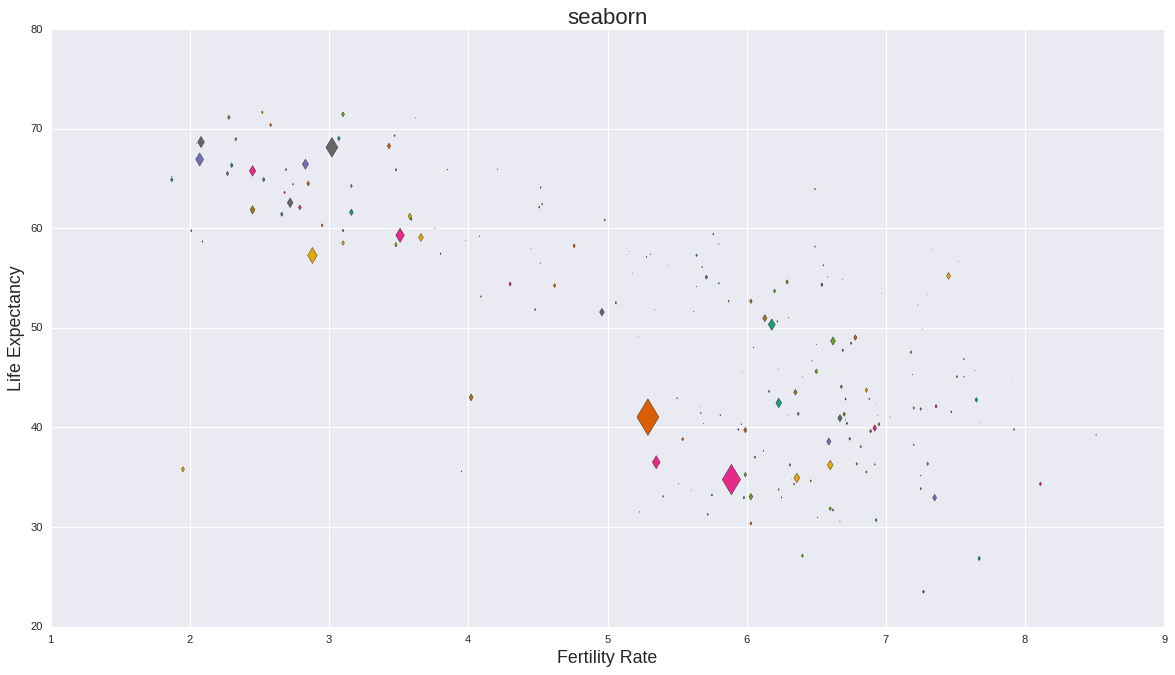

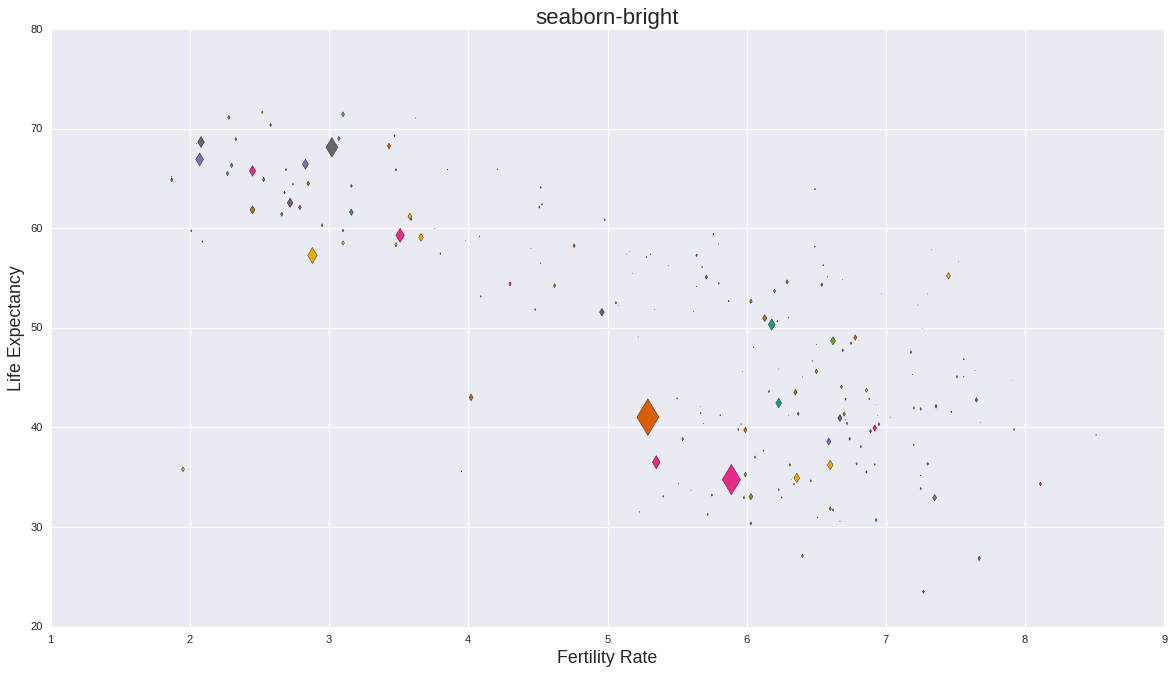

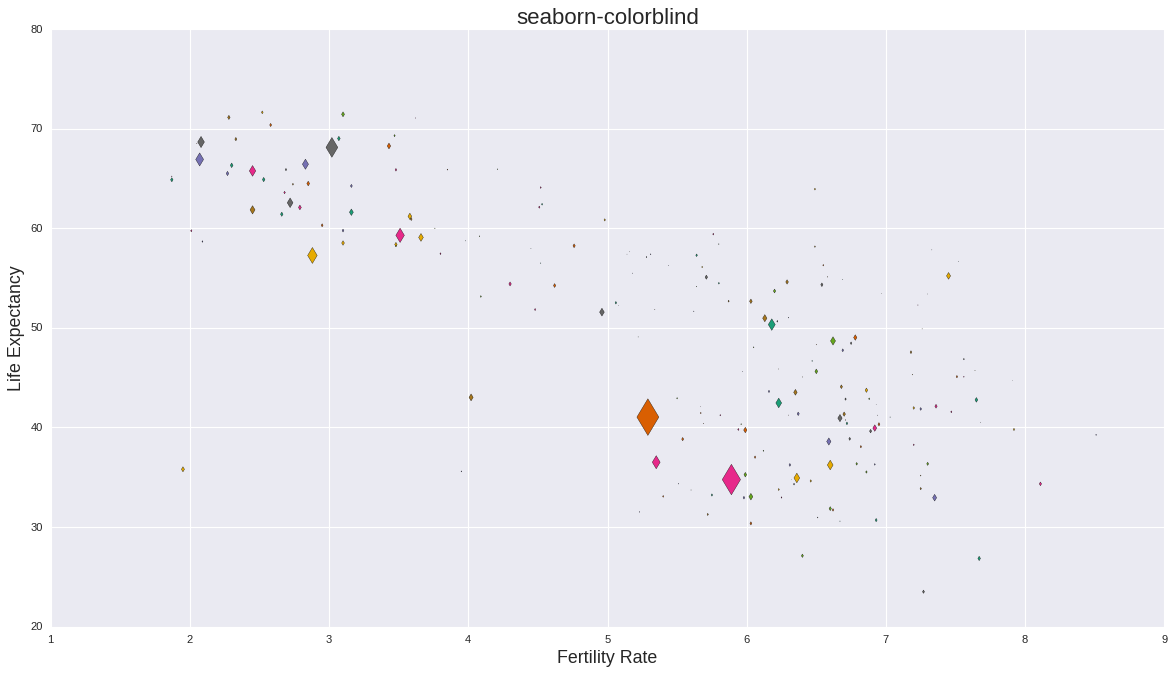

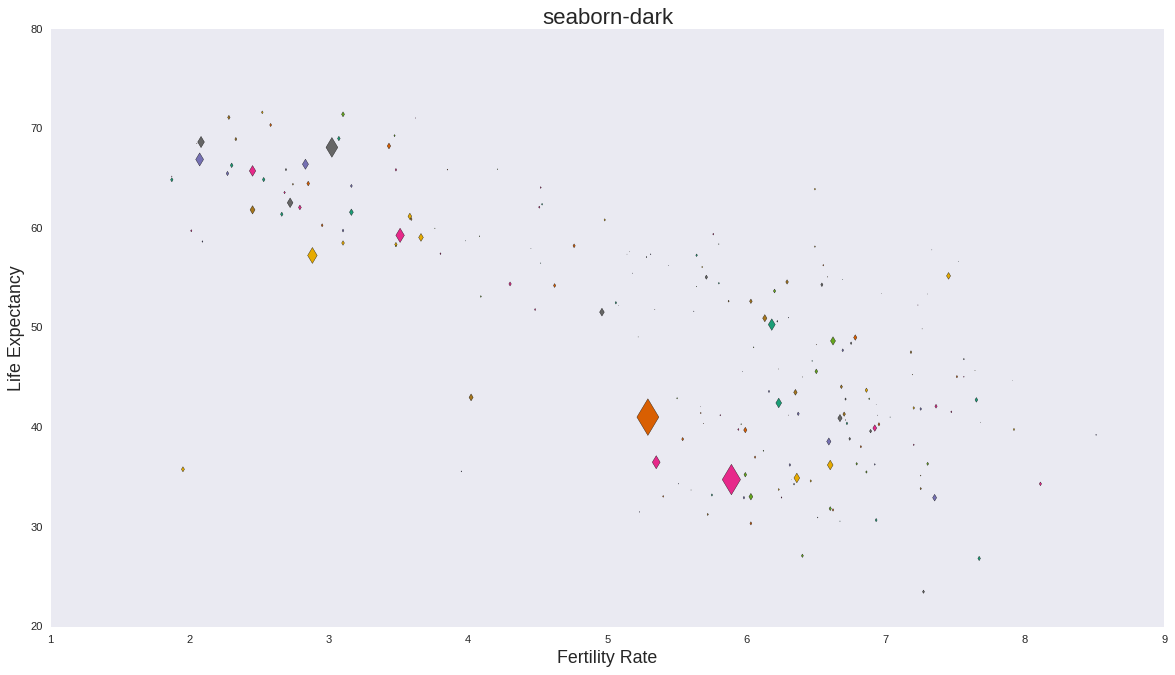

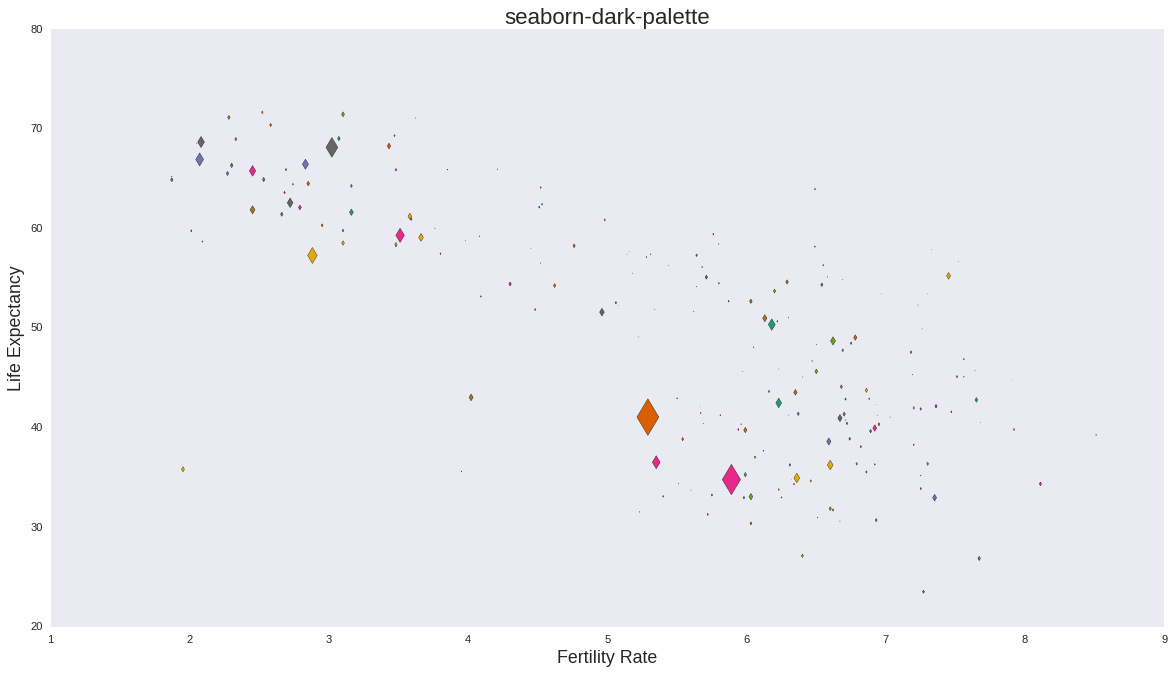

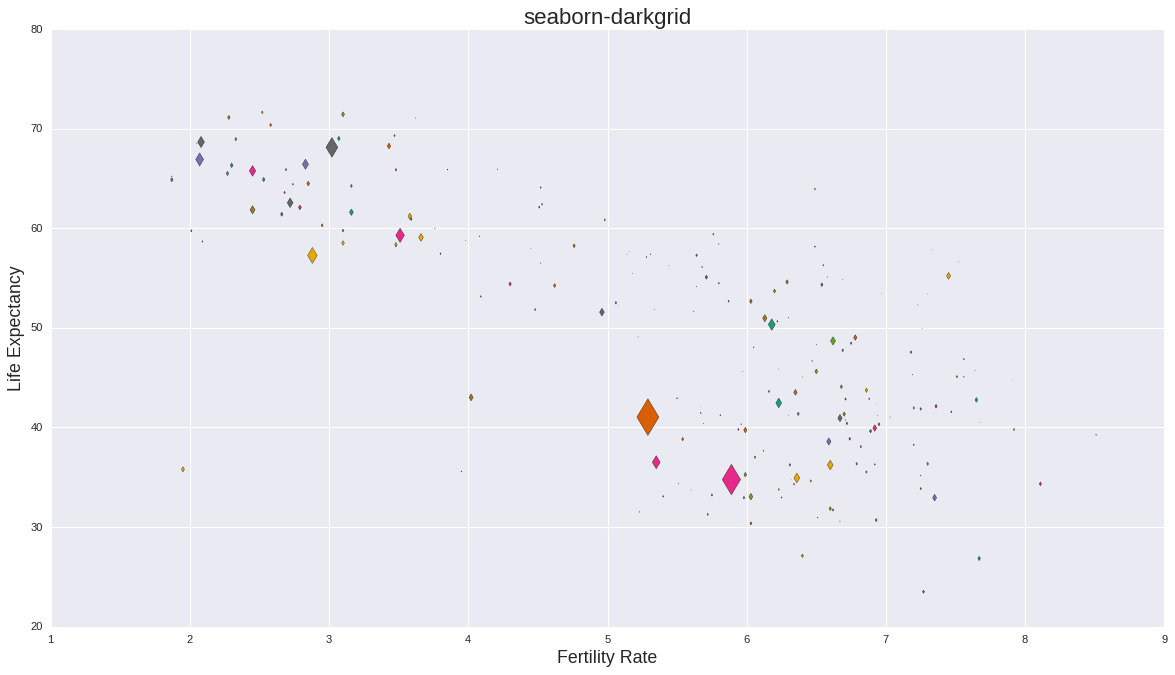

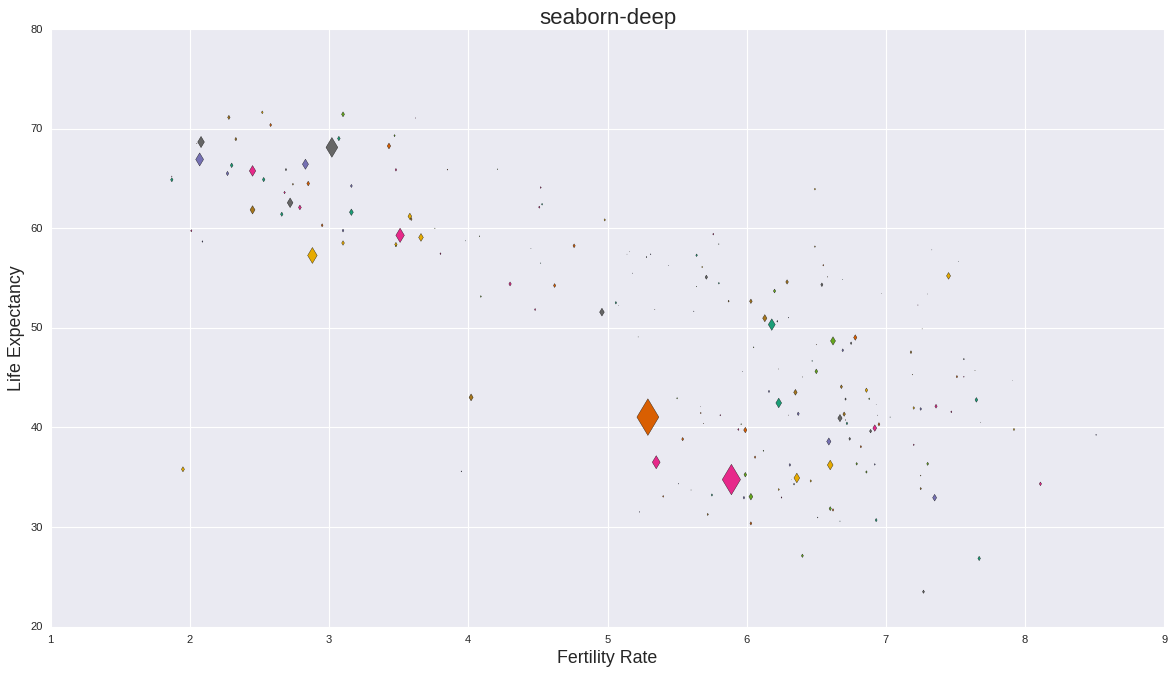

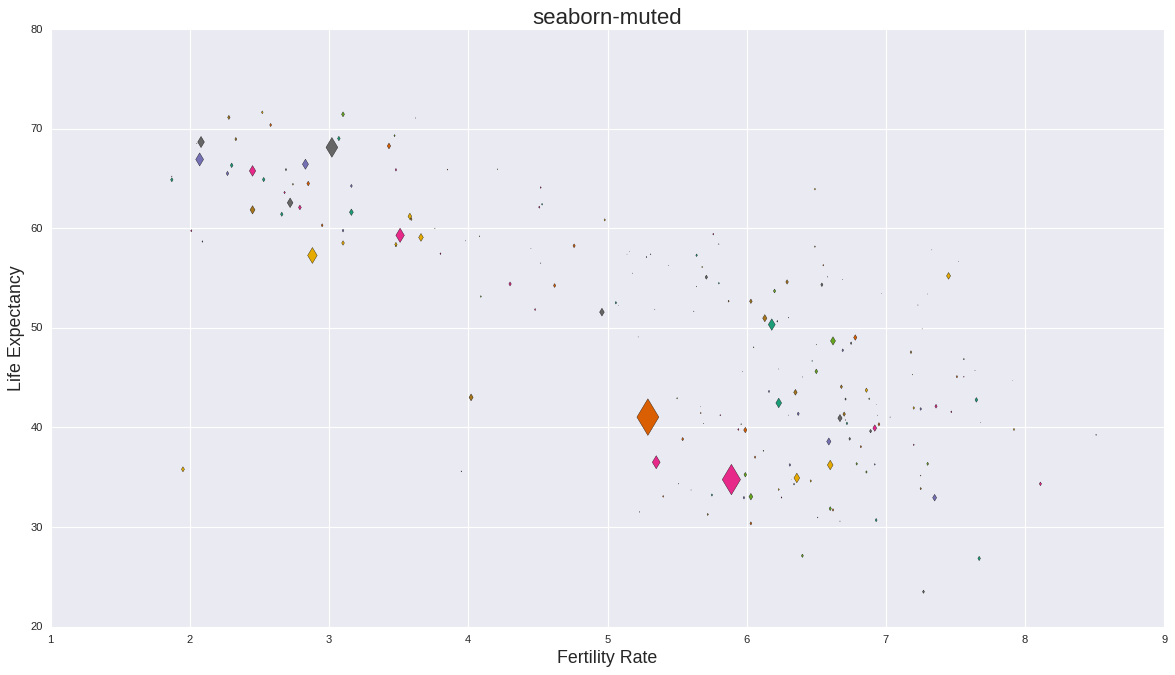

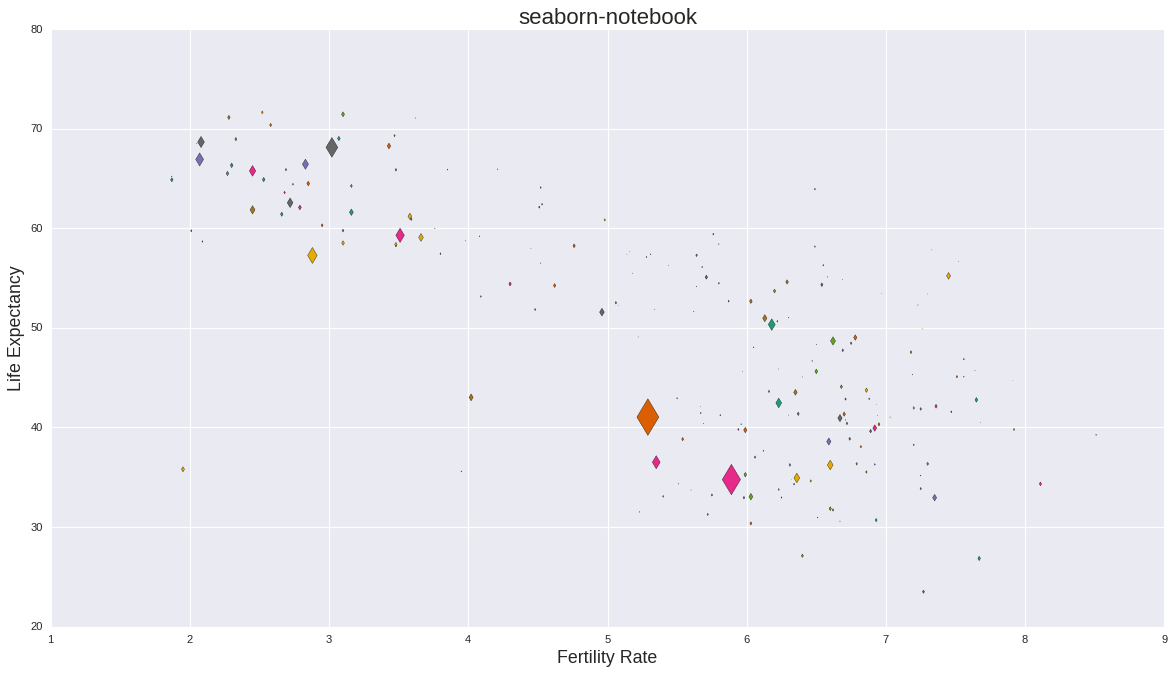

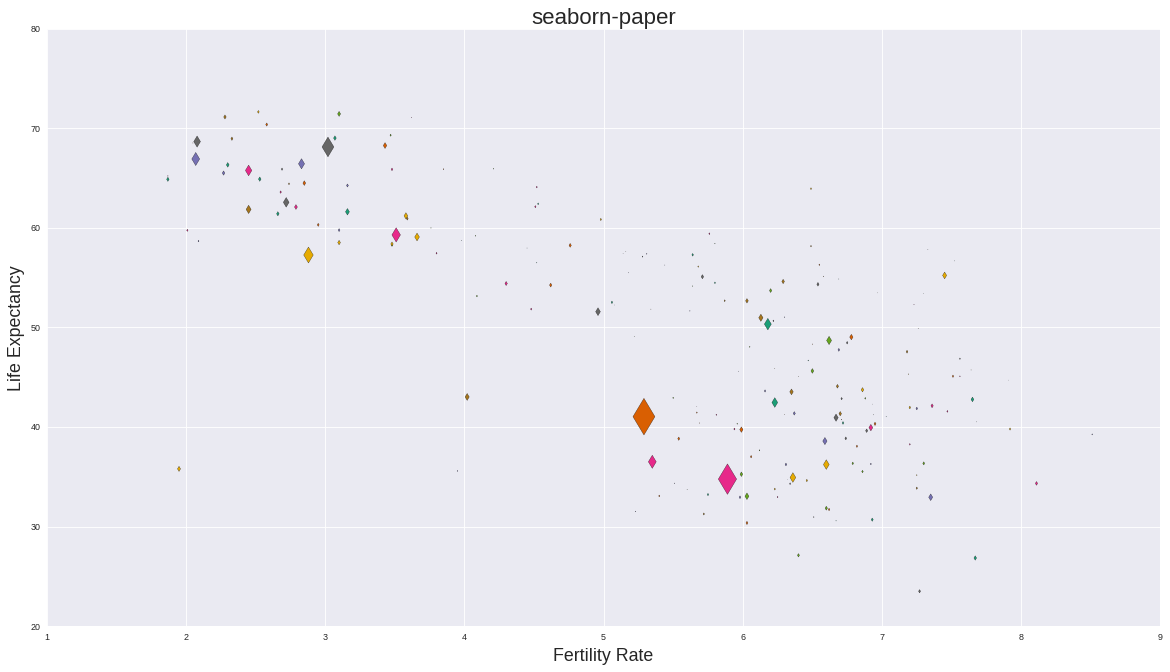

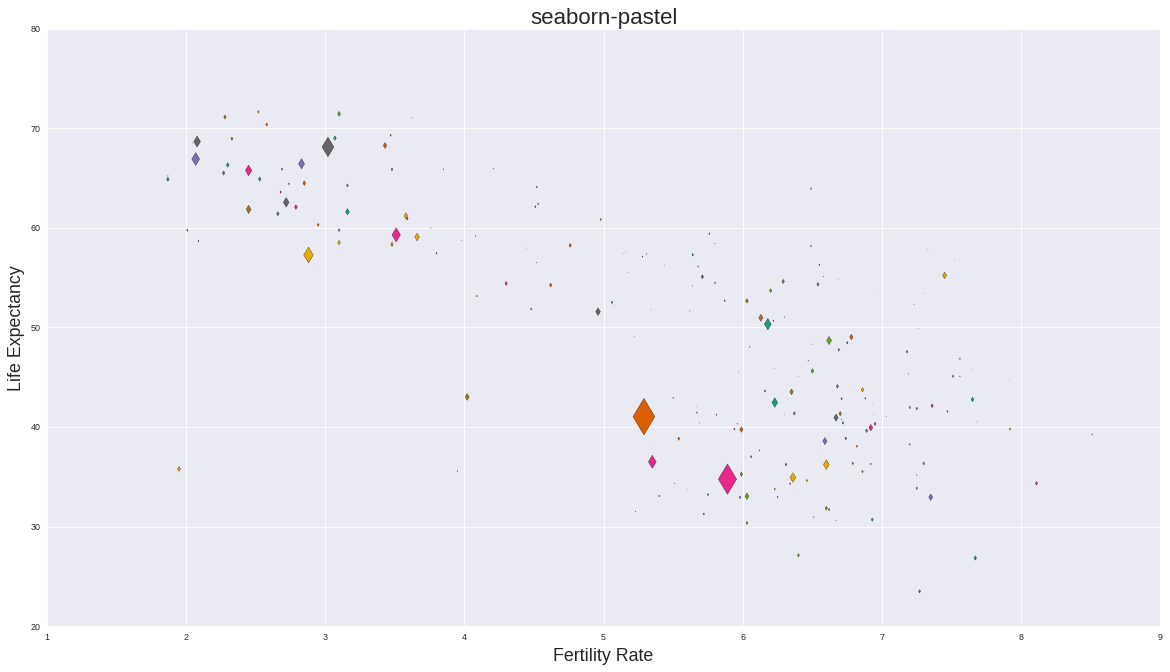

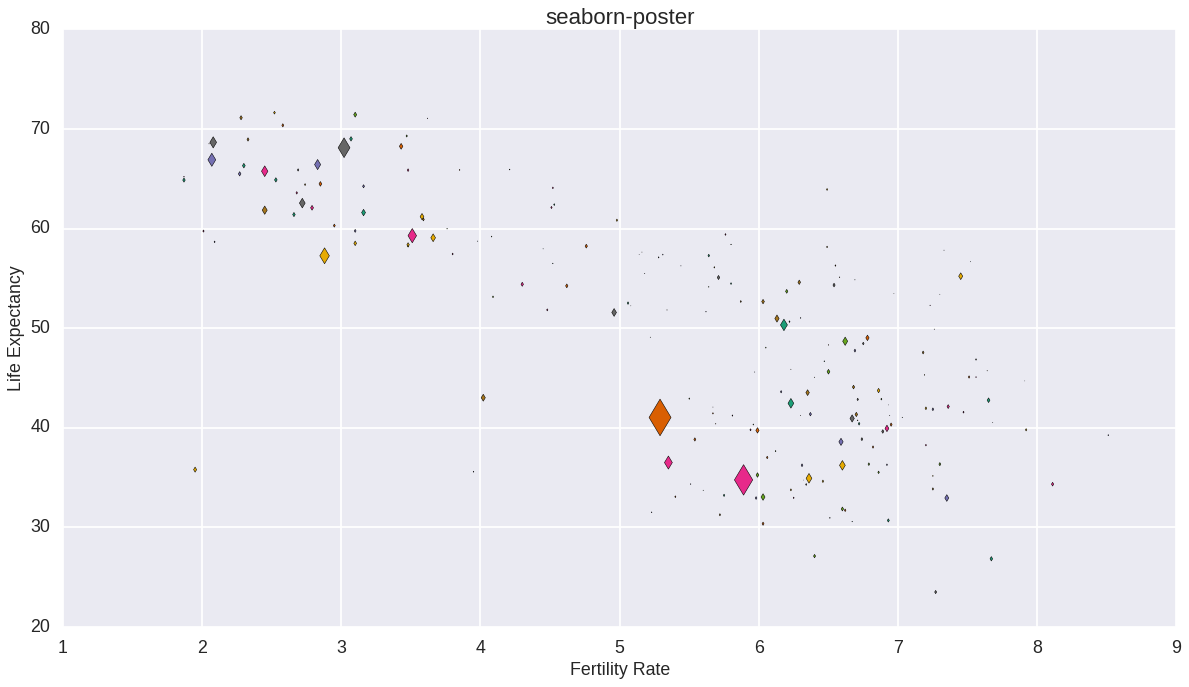

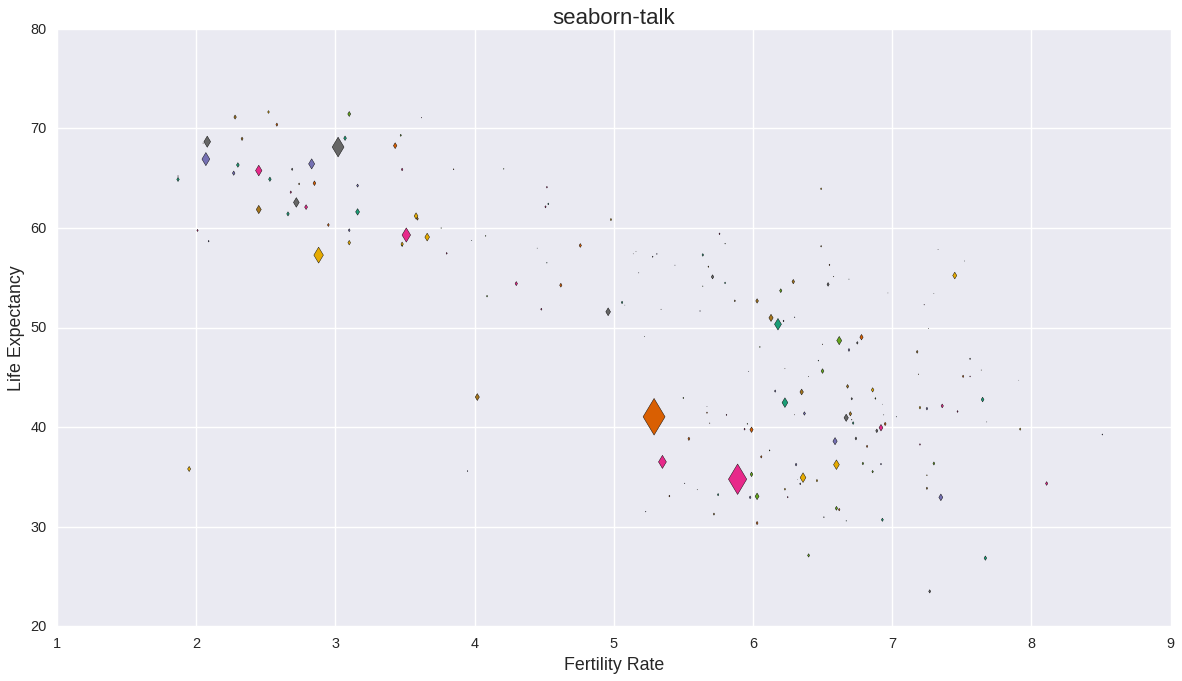

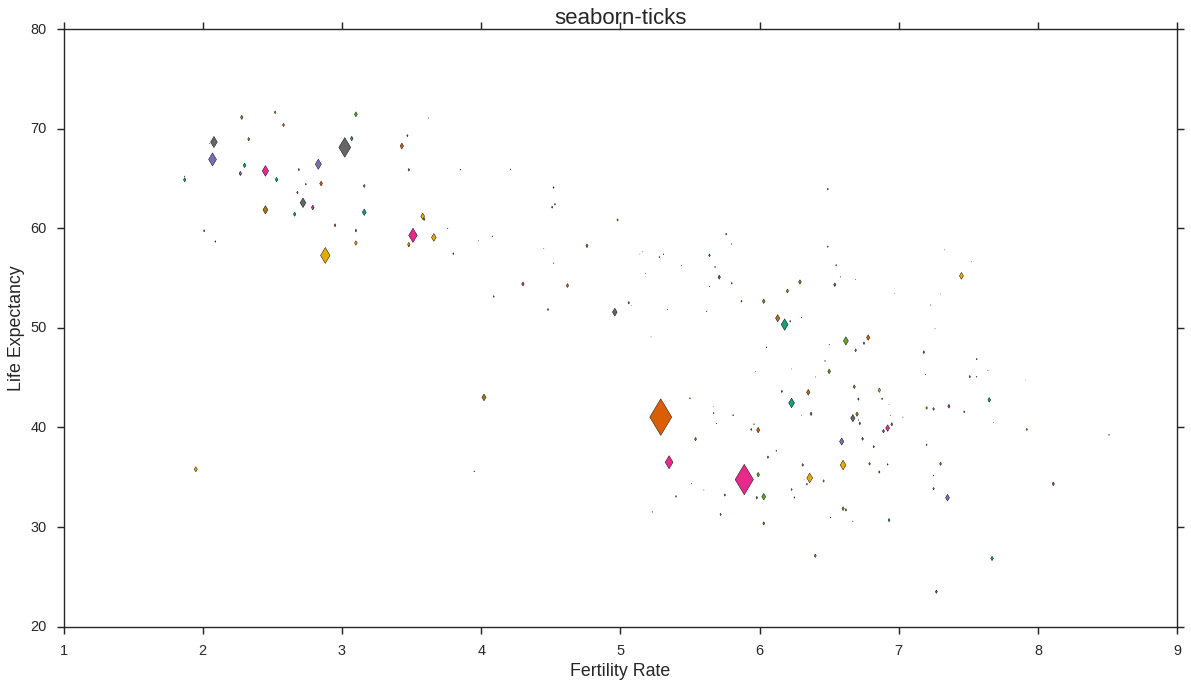

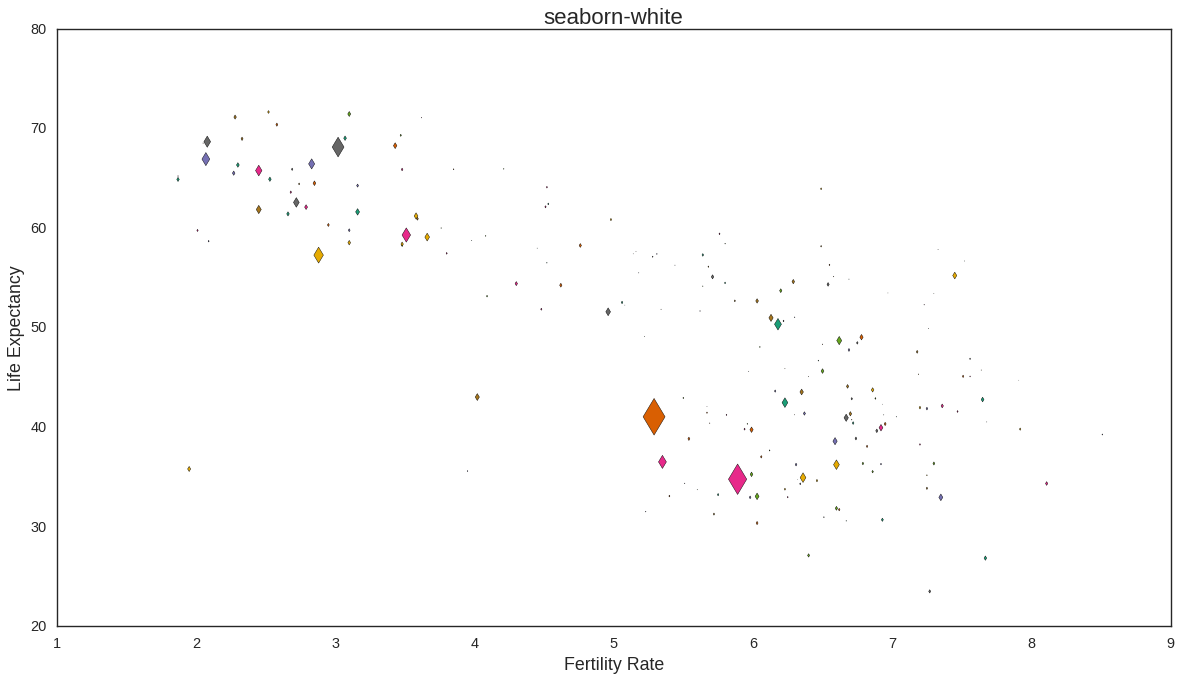

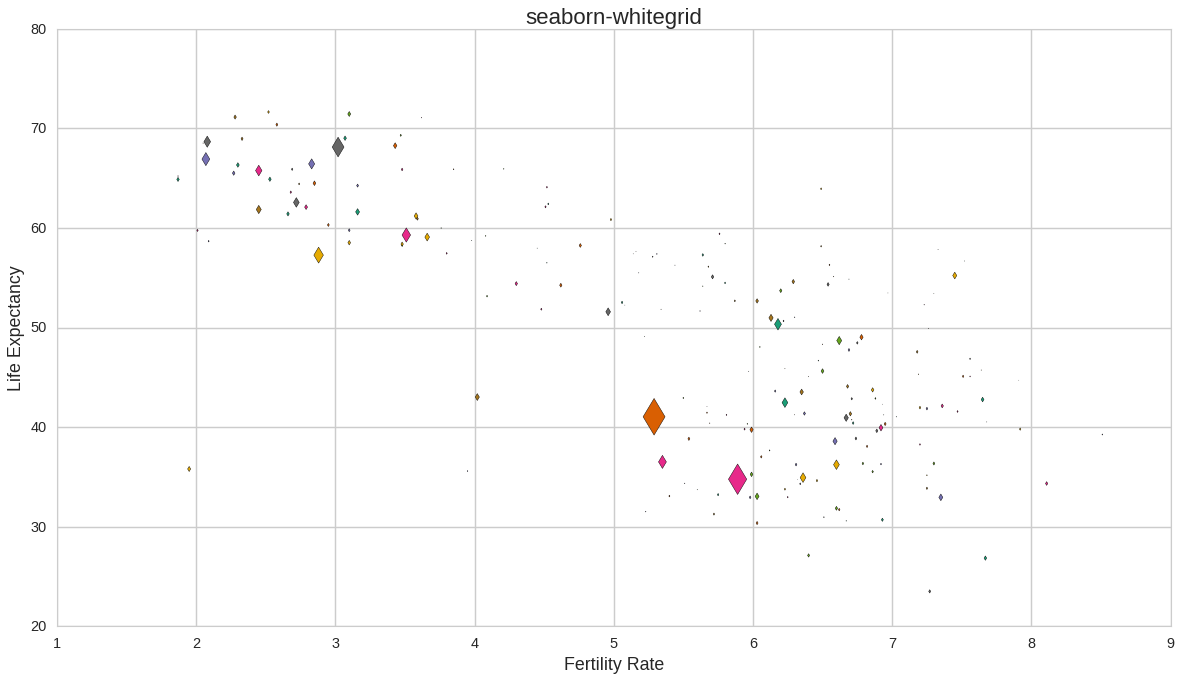

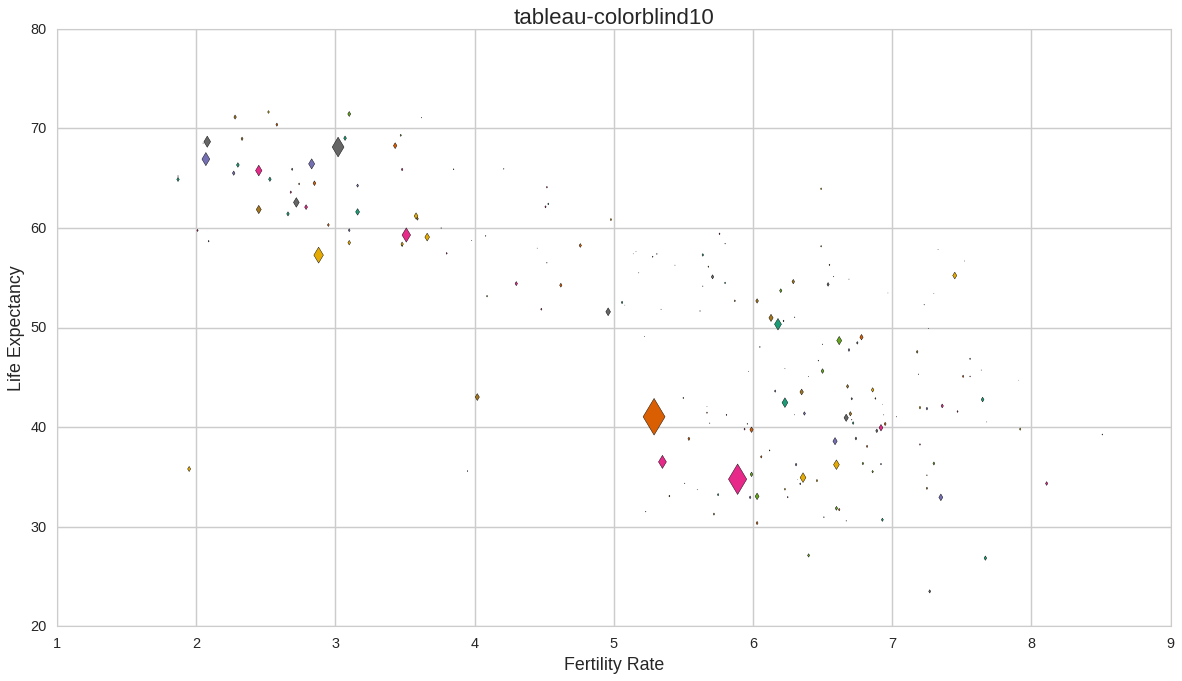

In [27]:
# attempt at beautyfying with different styles

plt_styles = ['Solarize_Light2', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']

for style in plt_styles:
    plt.style.use(style)
    cmap = plt.get_cmap('Dark2', lut = len(df6)).colors
    df6.plot.scatter('fertility', 'lifeexp', s=df6['population_in_millions'], c=cmap, marker="d", figsize=(16,8))
    plt.title(style, fontsize=20)
    plt.xlabel('Fertility Rate', fontsize=16)
    plt.ylabel('Life Expectancy', fontsize=16)
    

### Step 10

In [28]:
df7 = df3.unstack(1)


In [ ]:
for i in range(1960, 2016):
    new_df = df7[i]
    new_df = new_df.unstack(1)
    
    cmap = plt.get_cmap('tab20', lut = len(new_df)).colors
    new_df.plot.scatter('fertility', 'lifeexp', s=new_df['population_in_millions'], c=cmap)
    plt.title(f'{i}')
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
    
    plt.savefig(f'scatter_images/{i}.png')

In [30]:
# alternative style

# for i in range(1960, 2016):
#     new_df = df7[i]
#     new_df = new_df.unstack(1)

#     plt.style.use('seaborn-white')
#     cmap = plt.get_cmap('Dark2', lut = len(new_df)).colors
#     new_df.plot.scatter('fertility', 'lifeexp', s=new_df['population_in_millions'], c=cmap, marker="d", figsize=(16,9))
#     plt.title(f'- {i} -', fontsize=32)
#     plt.xlabel('Fertility Rate', fontsize=16)
#     plt.ylabel('Life Expectancy', fontsize=16)
    
#     plt.savefig(f'scatter_images_alt/{i}.png')

### Step 11

In [31]:
# already implemented

### Step 12

In [34]:
import imageio

images = []

for i in range(1960, 2016):
    filename = 'scatter_images/{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output3.gif', images, fps=15)

